# Visualize decoded spots from MERlin

by Pu Zheng

2021.05.27

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

31360


In [3]:
import pandas

In [4]:
# decode result
merfish_data_folder = r'J:\Data\0506-P_Forebrain_M1'
merfish_analysis_folder = r'J:\MERFISH_Analysis\0506-P_Forebrain_M1'
# barcode file
barcode_filename = os.path.join(merfish_analysis_folder, 'ExportBarcodes', 'barcodes.csv')

In [5]:
barcodes = pandas.read_csv(barcode_filename)

In [8]:
fov_id = 0
fov_barcodes = barcodes[barcodes['fov']==fov_id]

In [17]:
color_limit = (np.max(fov_barcodes['barcode_id'])+1)

In [30]:
Spectral(fov_barcodes['barcode_id'] / color_limit)

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.61960784, 0.00392157, 0.25882353, 1.        ],
       ...,
       [0.31449443, 0.3799308 , 0.66851211, 1.        ],
       [0.33479431, 0.35363322, 0.65605536, 1.        ],
       [0.34832757, 0.3361015 , 0.64775087, 1.        ]])

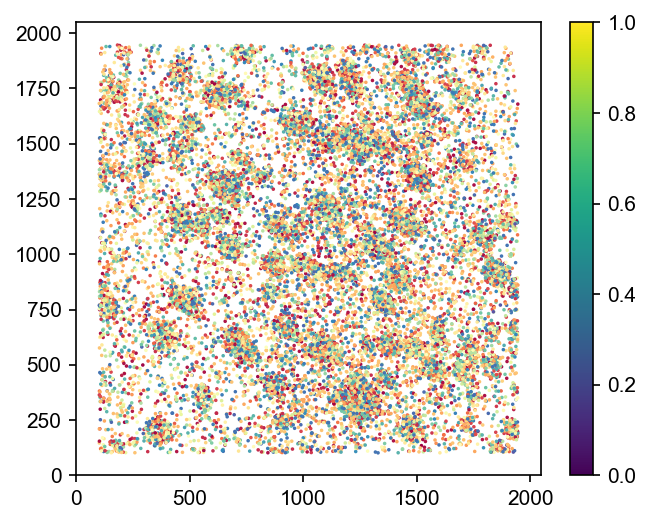

In [46]:
%matplotlib inline
from matplotlib.cm import Spectral
plt.figure(figsize=(5,4),dpi=150)
plt.scatter(fov_barcodes['x'], fov_barcodes['y'], #c=fov_barcodes['barcode_id'], size=1,
            c=Spectral(fov_barcodes['barcode_id'] / color_limit),
            s=0.5, 
             )
plt.xlim([0,2048])
plt.ylim([0,2048])
plt.colorbar()
plt.show()

# Load DNA processed data

In [209]:
reload(ia)
reload(classes)
reload(classes.batch_functions)
reload(classes.field_of_view)
reload(io_tools.load)

reload(visual_tools)
reload(ia.correction_tools)
reload(ia.correction_tools.alignment)
reload(ia.spot_tools.matching)
reload(ia.segmentation_tools.chromosome)
reload(ia.spot_tools.fitting)

fov_param = {'data_folder':r'\\10.245.74.158\Chromatin_NAS_5\20210506-P_Forebrain_MERFISH_CTP09',
             'save_folder':r'I:\Pu_Temp\20210506-M1_MERFISH_CTP-09_P_forebrain',
             #'save_folder':r'D:\Pu_Temp\202009_IgH_proB_DMSO_2color',
             'experiment_type': 'DNA',
             'num_threads': 20,
             #'correction_folder':r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20210514-Corrections_2color_50_new_fiber',
             'correction_folder':r'I:\Corrections\20210514-Corrections_2color_50_new_fiber',
             'shared_parameters':{
                     'single_im_size':[50,2048,2048],
                     'corr_channels':['750','647'],
                     'num_empty_frames': 0, 
                     'corr_hot_pixel':True,
                     'corr_Z_shift':False,
                     'corr_bleed':False,
                     'min_num_seeds':250,
                     'max_num_seeds': 2000,
                     'spot_seeding_th': 150,
                     'normalize_intensity_local':False,
                     'normalize_intensity_background':False,
                 }, 
             'ref_id': 0, # special for this experiment
             }

fov = classes.field_of_view.Field_of_View(fov_param, _fov_id=fov_id,
                                          _color_info_kwargs={
                                              '_color_filename':'Color_Usage',
                                          }, 
                                          _prioritize_saved_attrs=False,
                                          )

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 44
- Number of field of views: 81
- Importing csv format color_usage file: \\10.245.74.158\Chromatin_NAS_5\20210506-P_Forebrain_MERFISH_CTP09\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
dict_keys(['H0R0', 'H1R1', 'H2R2', 'H3R3', 'H4R4', 'H5R5', 'H6R6', 'H7R7', 'H8R8', 'H9R9', 'H10R10', 'H11R11', 'H12RG1', 'H13RG2', 'H14RG3', 'H15R1', 'H16R2', 'H17R3', 'H18R4', 'H19R5', 'H20R6', 'H21R7', 'H22R8', 'H23R9', 'H24R10', 'H25R11', 'H26R12', 'H27R13', 'H28R14', 'H29R15', 'H30R16', 'H31R17', 'H32RS1', 'H33RS2', 'H34RS3', 'H35RS4', 'H36RS5', 'H37RS6', 'H38RS7', 'H39RS8', 'H40RS9', 'H41RS10'])
- 41 folders are found according to color-usage annotation.
+ loading fov_info from file: I:\Pu_Temp\20210506-M1_MERFISH_CTP-09_P_forebrain\Conv_zscan_00.hdf5
++ base attributes loaded:['dapi_im', 'ref_im'] in 4.555s.
+ loading correction from file: I:\P

In [210]:
fov._load_from_file('merfish')

+ loading merfish from file: I:\Pu_Temp\20210506-M1_MERFISH_CTP-09_P_forebrain\Conv_zscan_00.hdf5
++ finish loading merfish in 0.008s. 


E:\Users\puzheng\Documents\ImageAnalysis3\classes\field_of_view.py:1463: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  _spots_list = np.array([_spots[_spots[:,0] > 0] for _flg, _spots in zip(_flags, _grp['spots'][:]) if _flg > 0])


In [211]:
dapi_im = fov._load_dapi_image(_overwrite=True)

-- choose dapi images from folder: \\10.245.74.158\Chromatin_NAS_5\20210506-P_Forebrain_MERFISH_CTP09\H0R0.
- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210506-P_Forebrain_MERFISH_CTP09\H0R0\Conv_zscan_00.dax
-- loading illumination correction profile from file:
	 405 illumination_correction_405_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20210506-P_Forebrain_MERFISH_CTP09\H0R0\Conv_zscan_00.dax  in 48.081s
-- removing hot pixels for channels:['405'] in 20.854s
-- illumination correction for channels: 405, in 4.103s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 74.019s
-- saving fov_info to file: I:\Pu_Temp\20210506-M1_MERFISH_CTP-09_P_forebrain\Conv_zscan_00.hdf5
++ base attributes saved:['dapi_im'] in 11.177s.


In [216]:
fov.color_dic

{'H0R0': ['', 'polyT', 'beads', 'DAPI'],
 'H1R1': ['m2', 'm1', 'beads'],
 'H2R2': ['m4', 'm3', 'beads'],
 'H3R3': ['m6', 'm5', 'beads'],
 'H4R4': ['m8', 'm7', 'beads'],
 'H5R5': ['m10', 'm9', 'beads'],
 'H6R6': ['m12', 'm11', 'beads'],
 'H7R7': ['m14', 'm13', 'beads'],
 'H8R8': ['m16', 'm15', 'beads'],
 'H9R9': ['m18', 'm17', 'beads'],
 'H10R10': ['m20', 'm19', 'beads'],
 'H11R11': ['m22', 'm21', 'beads'],
 'H12RG1': ['g1', 'g2', 'beads'],
 'H13RG2': ['g3', 'g4', 'beads'],
 'H14RG3': ['g5', '', 'beads'],
 'H15R1': ['c1', 'c2', 'beads'],
 'H16R2': ['c3', 'c4', 'beads'],
 'H17R3': ['c5', 'c6', 'beads'],
 'H18R4': ['c7', 'c8', 'beads'],
 'H19R5': ['c9', 'c10', 'beads'],
 'H20R6': ['c11', 'c12', 'beads'],
 'H21R7': ['c13', 'c14', 'beads'],
 'H22R8': ['c15', 'c16', 'beads'],
 'H23R9': ['c17', 'c18', 'beads'],
 'H24R10': ['c19', 'c20', 'beads'],
 'H25R11': ['c21', 'c22', 'beads'],
 'H26R12': ['c23', 'c24', 'beads'],
 'H27R13': ['c25', 'c26', 'beads'],
 'H28R14': ['c27', 'c28', 'beads'],
 'H2

In [217]:
fov.polyt_channel_index=1

In [221]:
polyt_im = fov._load_bead_image(_bead_id=0)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210506-P_Forebrain_MERFISH_CTP09\H0R0\Conv_zscan_00.dax
-- loading illumination correction profile from file:
	 488 illumination_correction_488_2048x2048.npy
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20210506-P_Forebrain_MERFISH_CTP09\H0R0\Conv_zscan_00.dax  in 1.863s
-- removing hot pixels for channels:['488'] in 19.099s
-- illumination correction for channels: 488, in 3.955s
-- warp image with drift:[0. 0. 0.] in 0.000s
-- finish correction in 25.827s


In [234]:
plt.close('all')

In [235]:
%matplotlib inline
plt.figure()

plt.show()

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>


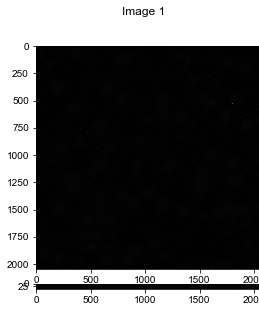

<IPython.core.display.Javascript object>


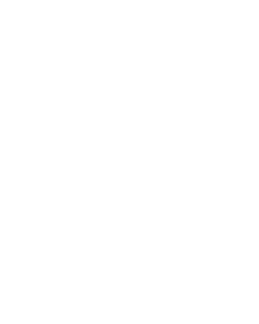

In [236]:
%matplotlib notebook

visual_tools.imshow_mark_3d_v2([polyt_im, fov.dapi_im])


In [5]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.0872, 0.3367, 0.5963],
        [0.1122, 0.6791, 0.3927],
        [0.1542, 0.3834, 0.7715],
        [0.1751, 0.2390, 0.9460],
        [0.5264, 0.8635, 0.4609]])


In [6]:
torch.cuda.is_available()


E:\Users\puzheng\AppData\anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10000). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


False

In [2]:
import cellpose
from cellpose import models


2021-05-29 17:45:39,379 [INFO] WRITING LOG OUTPUT TO C:\Users\puzheng\.cellpose\run.log


In [3]:
model_2d = models.Cellpose(gpu=True, model_type='cyto')

2021-05-29 17:45:41,773 [INFO] TORCH CUDA version not installed/working.
2021-05-29 17:45:41,774 [INFO] >>>> using CPU


In [282]:
test_im = np.array([
    polyt_im[start_layer:-start_layer].mean(0),
    fov.dapi_im[start_layer:-start_layer].max(0),
])

In [288]:
model_2d = models.Cellpose(gpu=True, model_type='cyto')
masks_2d, flows_2d, styles_2d, diams_2d = model_2d.eval(#polyt_im[start_layer:-start_layer].mean(0),
                                                        test_im,
                                                        channels=[1,2], 
                                                        channel_axis=0,
                                                        diameter=60, 
                                                        min_size=200,
                                                        do_3D=False)

2021-05-29 17:35:52,291 [INFO] TORCH CUDA version not installed/working.
2021-05-29 17:35:52,292 [INFO] >>>> using CPU
2021-05-29 17:35:52,377 [INFO] ~~~ FINDING MASKS ~~~
2021-05-29 17:39:38,835 [INFO] >>>> TOTAL TIME 226.46 sec


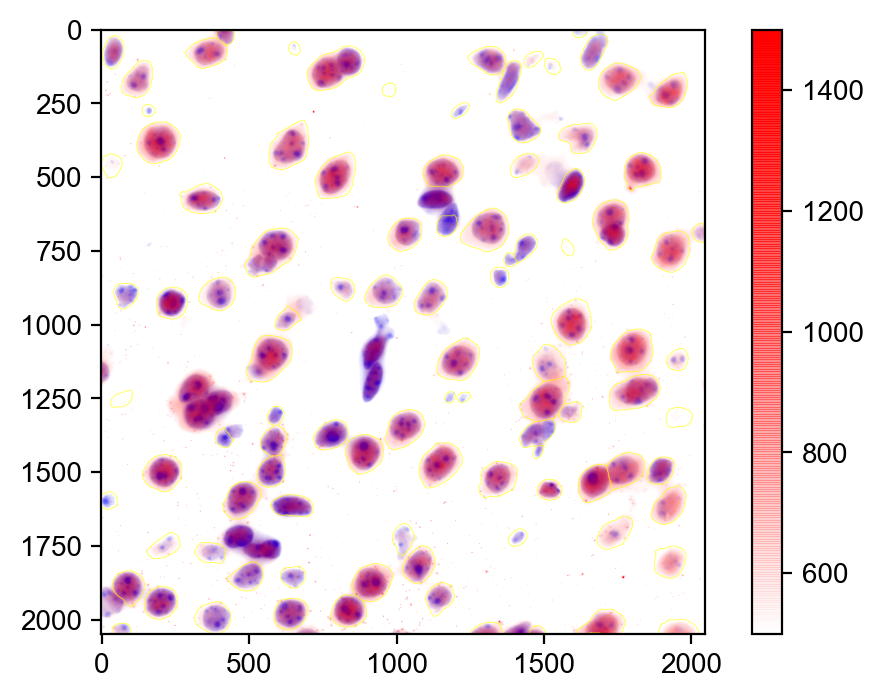

In [289]:
%matplotlib inline
start_layer = 10
plt.figure(dpi=200)
plt.imshow(fov.dapi_im[start_layer:-start_layer].max(0), vmin=1000, vmax=3000, 
           cmap=figure_tools.color.transparent_gradient([0,0,1]), )
plt.imshow(polyt_im[start_layer:-start_layer].mean(0), vmin=500, vmax=1500, 
           cmap=figure_tools.color.transparent_gradient([1,0,0]), )
plt.colorbar()
plt.imshow(find_boundaries(masks_2d), cmap=figure_tools.color.transparent_gradient([1,1,0]))

#plt.imshow(find_boundaries(masks_2d), cmap=figure_tools.color.transparent_gradient([1,0,0]))

plt.show()

In [271]:
masks_2d

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [76]:
start_layer = 5

model_2d = models.Cellpose(gpu=True, model_type='nuclei')
masks_2d, flows_2d, styles_2d, diams_2d = model_2d.eval(fov.dapi_im[start_layer:-start_layer].max(0), 
                                                        diameter=60, channels=[0,0], 
                                                        min_size=100,
                                                        do_3D=False)

2021-05-28 13:44:26,646 [INFO] TORCH CUDA version not installed/working.
2021-05-28 13:44:26,647 [INFO] >>>> using CPU
2021-05-28 13:44:26,879 [INFO] ~~~ FINDING MASKS ~~~
2021-05-28 13:46:08,705 [INFO] >>>> TOTAL TIME 101.83 sec


In [78]:
from skimage.segmentation import find_boundaries

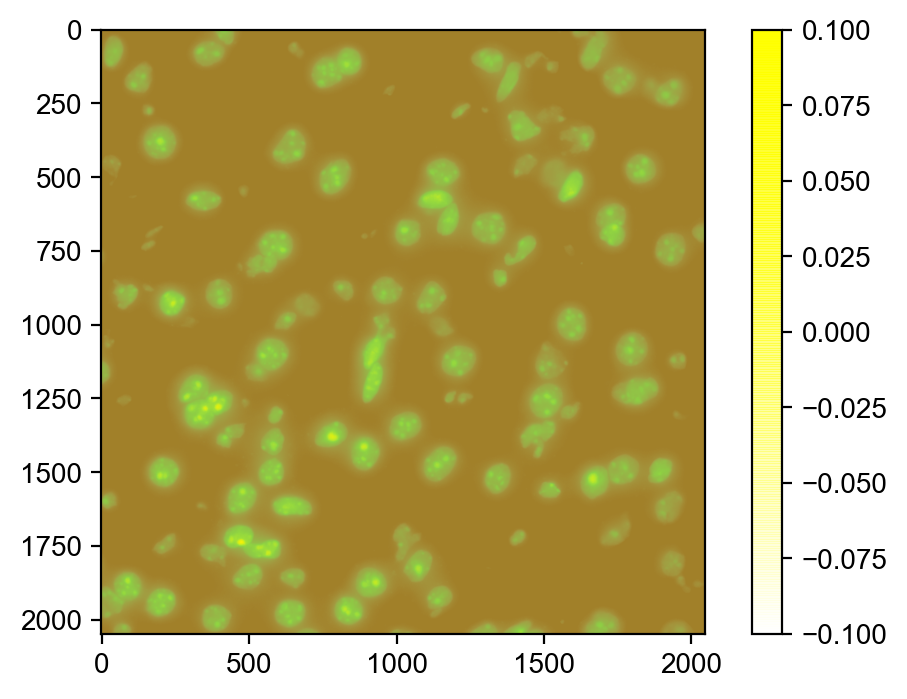

In [272]:
plt.figure(dpi=200)
plt.imshow(fov.dapi_im[start_layer:-start_layer].max(0), vmin=500, vmax=4000)
plt.imshow(find_boundaries(masks_2d), cmap=figure_tools.color.transparent_gradient([1,1,0]))
plt.colorbar()
plt.show()

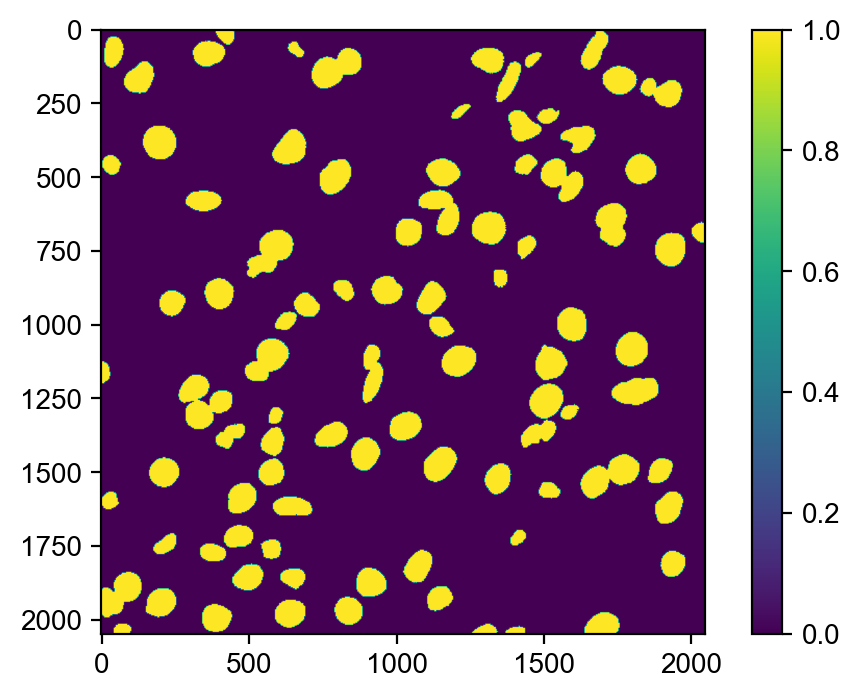

In [82]:
plt.figure(dpi=200)
plt.imshow(masks_2d>0)
plt.colorbar()
plt.show()

In [83]:
from pandas import DataFrame

In [207]:
import pandas
class info_table(DataFrame):
    """Class for color_usage"""
    def __init__(self, filename, table_type=None, auto_load=True, load_kwargs={}, verbose=True):
        # inherit from super class
        super().__init__()
    
        # store filenames
        self.filename = filename
        self.auto_load = auto_load
        if table_type is None:
            table_type = self.filename.split(os.extsep)[-1]
        self.table_type = table_type
        
        self.verbose = verbose
        
        # load file if specified
        if auto_load:
            if self.verbose:
                print(f"- automatic load is on")
            self._load(load_kwargs)
        
    def __str__(self):
        _output_string = super().__str__()
        _output_string += f"\ninfo_table class from file: {self.filename}"
        return _output_string
    
    def _load(self, load_kwargs):
        if self.verbose:
            print(f"- load from file: {self.filename}")
        _df = getattr(pandas, f"read_{self.table_type}")(self.filename, **load_kwargs)
        print(type(_df), type(self))
        self.join(_df)
        print(self.columns)
        
        return self
    
    def _search(self, feature, select_id=None):
        pass
    
    
    

In [208]:
color_filename = os.path.join(fov.analysis_folder,fov.color_filename+os.extsep+fov.color_format)

color_df = info_table(color_filename)

- automatic load is on
- load from file: \\10.245.74.158\Chromatin_NAS_5\20210506-P_Forebrain_MERFISH_CTP09\Analysis\Color_Usage.csv
<class 'pandas.core.frame.DataFrame'> <class '__main__.info_table'>
Index([], dtype='object')


In [206]:
print(color_df)

Empty info_table
Columns: []
Index: []
info_table class from file: \\10.245.74.158\Chromatin_NAS_5\20210506-P_Forebrain_MERFISH_CTP09\Analysis\Color_Usage.csv


In [200]:
?pandas.DataFrame

In [203]:
color_df.append(pandas.DataFrame([750,'test']))

,0
0,750
1,test
